# Mutually repressing gene circuit
This notebook generates the approximated moment equations for the _Mutually repressing gene circuit in a cell population_ case study of the LPAC paper.

The full transition network is represented by 
the following diagram:
$$
\begin{align}
	[x] &\xrightarrow{h_D(n; x,y)} [y] + [x-y] & \text{(Division)} \notag \\
	[x] + [x'] &\xrightarrow{h_A(n; x)} [x] & \text{(Apoptosis)} \notag \\
	[x] &\xrightarrow{h_{p_1}(n; x)} [x + (1,0)] & \text{(Production 1)} \notag \\
	[x] &\xrightarrow{h_{d_1}(n; x)} [x - (1,0)] & \text{(Degradation 1)} \notag \\
	[x] &\xrightarrow{h_{p_2}(n; x)} [x + (0,1)] & \text{(Production 2)} \notag \\
	[x] &\xrightarrow{h_{d_2}(n; x)} [x - (0,1)] & \text{(Degradation 2)} \notag
\end{align}
$$

While the propensity functions are as follows:
$$
\begin{align}
	h_D(n; x,y) &= k_D \, \pi_D(y \mid x) \, n_x \label{suppeq:MR:hD} \\
	h_A(n; x,x') &= k_A \, \frac{n_x (n_{x'} - \delta_{x,x'})}{1 + \delta_{x,x'}} \label{suppeq:MR:hA} \\
	h_{p_1}(n; x) &= k_p \, \frac{k_{R_1}}{k_{R_1} + x_2} \, n_x \label{suppeq:MR:hp1} \\
	h_{d_1}(n; x) &= k_d \, x_1 \, n_x \label{suppeq:MR:hd1} \\
 	h_{p_2}(n; x) &= k_p \, \frac{k_{R_2}}{k_{R_2} + x_1} \, n_x \label{suppeq:MR:hp2} \\
	h_{d_2}(n; x) &= k_d \, x_2 \, n_x \label{suppeq:MR:hd2} 
\end{align}
$$

In [1]:
# import sys
# !{sys.executable} -m pip install --upgrade pip
# !{sys.executable} -m pip install sympy
# !{sys.executable} -m pip install scipy
# !{sys.executable} -m pip install matplotlib

In [2]:
# Remove matplotlib deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
# initialize sympy printing (for latex output)
from sympy import init_printing, Symbol
init_printing()

# import functions and classes for compartment models
import sys
sys.path.insert(0, "./compartor") #use local copy
from compartor import *

# Define shorthands for Moment and Expectation
M, E = Moment, Expectation

Here, we illustrate how to export the moment equations in LaTeX format or generate code for simulations.

We consider again the exemplary model of the paper and derive moments equations with the automated function.

In [4]:
x = Content('x')
y = Content('y')

from sympy import symbols, log, exp, sin, cos, tan

kM_R0, kM_R1 = symbols('kM_R0 kM_R1')

def _hill(v, kM, h):
    return v**h / ( v**h + kM**h)

def _mm(x, kM):
    return _hill(x, kM, 1)

def _reprMM(x, kM):
    return _mm(kM, x)

# define fragmentation distribution
pi_F0 = OutcomeDistribution.Uniform(Symbol("\pi_{F0}(y|x)"), y[0], 0, x[0])
pi_F1 = OutcomeDistribution.Uniform(Symbol("\pi_{F1}(y|x)"), y[1], 0, x[1])
pi_F = OutcomeDistribution.CombineIndependent(Symbol("\pi_F(y|x)"), pi_F0, pi_F1)

Birth0         = TransitionClass( [x]       -to> [x+(1,0)],       'k_b', g=kM_R0/(kM_R0+x[1]), name='b_0')
Death0         = TransitionClass( [x]       -to> [x+(-1,0)],       'k_d', g=x[0],    name='d_0')
Birth1         = TransitionClass( [x]       -to> [x+(0,1)],       'k_b', g=kM_R1/(kM_R1+x[0]), name='b_1')
Death1         = TransitionClass( [x]       -to> [x+(0,-1)],       'k_d', g=x[1],    name='d_1')

Exit          = TransitionClass( [x] + [y] -to> [y], 'k_E', name='E')

Division = TransitionClass( [x]       -to> [y] + [x-y], 'k_F', pi=pi_F, name='F')

transitions = [Exit, Division, Birth0, Death0, Birth1, Death1]
display_transition_classes(transitions)

[x] + [y] ---> [y],  h_E = k_E*(n(y) - KroneckerDelta(x, y))*n(x)/(KroneckerDelta(x, y) + 1)
                     [x] ---> [x - y] + [y],  h_F = \pi_F(y|x)*k_F*n(x)                     
               [x] ---> [(1, 0) + x],  h_b_0 = kM_R0*k_b*n(x)/(kM_R0 + x[1])                
                       [x] ---> [(-1, 0) + x],  h_d_0 = k_d*n(x)*x[0]                       
               [x] ---> [(0, 1) + x],  h_b_1 = kM_R1*k_b*n(x)/(kM_R1 + x[0])                
                       [x] ---> [(0, -1) + x],  h_d_1 = k_d*n(x)*x[1]                       

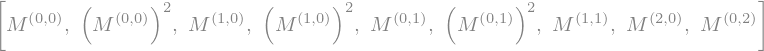

> Compute Moment Equations: computing equations for 9 moments
 [0:00:08.701989]
> Compute Moment Equations: computing equations for 8 moments
 [0:00:19.330641]
> Compute Moment Equations: computing equations for 6 moments
 [0:00:33.163892]
> Compute Moment Equations: computing equations for 3 moments
 [0:00:22.607518]
> Compute Moment Equations: computing equations for 1 moments
 [0:00:07.217581]
> Automated Moment Equations: #equations=27 [0:01:31.149525]


Computed moment equations for desired moments $\left< N\right> $, $\left< N^{2}\right> $, $\left< M^{\left(1, 0\right)}\right> $, $\left< {\left(M^{\left(1, 0\right)}\right)}^{\mathtt{\text{2}}}\right> $, $\left< M^{\left(0, 1\right)}\right> $, $\left< {\left(M^{\left(0, 1\right)}\right)}^{\mathtt{\text{2}}}\right> $, $\left< M^{\left(1, 1\right)}\right> $, $\left< M^{\left(2, 0\right)}\right> $, and $\left< M^{\left(0, 2\right)}\right> $.

Equations were iteratively added for $\left< M^{\left(0, 1\right)} M^{\left(2, 0\right)}\right> $, $\left< M^{\left(0, 1\right)} M^{\left(1, 0\right)}\right> $, $\left< N M^{\left(1, 0\right)}\right> $, $\left< N M^{\left(0, 2\right)}\right> $, $\left< M^{\left(0, 2\right)} M^{\left(1, 0\right)}\right> $, $\left< N M^{\left(0, 1\right)}\right> $, $\left< N M^{\left(1, 1\right)}\right> $, $\left< N M^{\left(2, 0\right)}\right> $, $\left< {\left(M^{\left(2, 0\right)}\right)}^{\mathtt{\text{2}}}\right> $, $\left< {\left(M^{\left(0, 2\right)}\right)}^{\mathtt{\text{2}}}\right> $, $\left< M^{\left(1, 0\right)} M^{\left(2, 0\right)}\right> $, $\left< M^{\left(0, 1\right)} M^{\left(0, 2\right)}\right> $, $\left< M^{\left(1, 0\right)} M^{\left(1, 1\right)}\right> $, $\left< M^{\left(0, 1\right)} M^{\left(1, 1\right)}\right> $, $\left< M^{\left(0, 2\right)} M^{\left(1, 1\right)}\right> $, $\left< M^{\left(1, 1\right)} M^{\left(2, 0\right)}\right> $, $\left< M^{\left(0, 2\right)} M^{\left(2, 0\right)}\right> $, and $\left< {\left(M^{\left(1, 1\right)}\right)}^{\mathtt{\text{2}}}\right> $.

In [5]:
moments = [
    M(0,0),
    M(0,0)**2,
    M(1,0),
    M(1,0)**2,
    M(0,1),
    M(0,1)**2,
    M(1,1),
    M(2,0),
    M(0,2),
]
display(moments)
equations = automated_moment_equations(2, transitions, moments, lpac=True, order=2, simplify_equations=False)
display_moment_equations(equations)

In [6]:
name = "MutualRepression"
julia_code = generate_julia_code(equations, function_name=name)
# print(julia_code)
filename=name+".jl"
with open(filename, 'w') as f:
    print(julia_code, file=f)
    print("Code written to file: %s" %(filename))

> Generating ODE body...
>> (1) Generating RHS code for Moment(0, 0)...
>>> Generating RHS code... [0:00:00.000166]
>>> Generating RHS comments...
>> (2) Generating RHS code for Moment(0, 0)**2...
>>> Generating RHS code... [0:00:00.000502]
>>> Generating RHS comments...
>> (3) Generating RHS code for Moment(1, 0)...
>>> Generating RHS code... [0:00:00.001439]
>>> Generating RHS comments...
>> (4) Generating RHS code for Moment(1, 0)**2...
>>> Generating RHS code... [0:00:00.002798]
>>> Generating RHS comments...
>> (5) Generating RHS code for Moment(0, 1)...
>>> Generating RHS code... [0:00:00.001244]
>>> Generating RHS comments...
>> (6) Generating RHS code for Moment(0, 1)**2...
>>> Generating RHS code... [0:00:00.002185]
>>> Generating RHS comments...
>> (7) Generating RHS code for Moment(1, 1)...
>>> Generating RHS code... [0:00:00.002374]
>>> Generating RHS comments...
>> (8) Generating RHS code for Moment(2, 0)...
>>> Generating RHS code... [0:00:00.002356]
>>> Generating RHS co

Code written to file: MutualRepression.jl
